# Requisiti progetto Titanic - Decision Tree

1. **Caricamento dati**  
   - Caricare il dataset `titanic_sub.csv` usando Pandas.  
   - Scegliere la colonna da utilizzare come indice del DataFrame (ad esempio `PassengerId`).

2. **Separazione target e feature**  
   - Identificare la variabile target: la colonna `Survived` (indicante la sopravvivenza del passeggero).  
   - Separare la variabile target dalle altre colonne che fungeranno da feature.

3. **Preprocessing delle feature**  
   - Preparare le feature affinché siano compatibili con sklearn.  
   - Utilizzare `get_dummies` di Pandas per codificare le variabili categoriche nominali (es. `Embarked`).  
   - Utilizzare `LabelEncoder` di sklearn per codificare variabili categoriche ordinali o binarie (es. `Sex`).

4. **Suddivisione del dataset**  
   - Dividere i dati in training set (75%) e test set (25%) usando `train_test_split` di sklearn.  
   - Bloccare la casualità usando `random_state=0` per rendere ripetibile l’esperimento.  
   - Suddividere ulteriormente il training set in training set vero e proprio e validation set, sempre con proporzione 75-25 e `random_state=0`.

5. **Modellazione**  
   - Creare un modello di albero decisionale (`DecisionTreeClassifier`).  
   - Validare la profondità massima dell’albero testando i valori: 2, 5, 10, 25 e profondità illimitata (`None`).  
   - Usare l’accuratezza come metrica di valutazione sulla validation set.

6. **Valutazione finale**  
   - Selezionare la profondità ottimale in base alle performance sulla validation set.  
   - Addestrare il modello finale su tutto il training set completo (training + validation).  
   - Valutare il modello finale sul test set e riportare l’accuratezza ottenuta.


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## 1. Data Collection

In [ ]:
# Carico il dataset
df =  pd.read_csv('titanic_sub.csv')

## 2. Analisi e Preprocessing dei Dati

In [2]:
df.shape

(891, 6)

In [3]:
df.isnull().sum()

PassengerId      0
Sex              0
Age            177
Pclass           0
Embarked         2
Survived         0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Sex          891 non-null    object 
 2   Age          714 non-null    float64
 3   Pclass       891 non-null    int64  
 4   Embarked     889 non-null    object 
 5   Survived     891 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 41.9+ KB


In [18]:
df['Sex'].value_counts()


Sex
male      577
female    314
Name: count, dtype: int64

In [5]:
df.head()

,PassengerId,Sex,Age,Pclass,Embarked,Survived
0,1,male,22.0,3,S,0
1,2,female,38.0,1,C,1
2,3,female,26.0,3,S,1
3,4,female,35.0,1,S,1
4,5,male,35.0,3,S,0


In [6]:
# Imposto 'PAssengerID' come index
df.set_index('PassengerId', inplace=True)

In [7]:
# Gestione valori mancanti in 'Age'
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])

In [8]:
# Gestione valori mancanti in 'Embarked'
imputer_cat = SimpleImputer(strategy='most_frequent')
df['Embarked'] = imputer_cat.fit_transform(df[['Embarked']]).ravel()


In [9]:
# LabelEncoder per 'Sex'
le = LabelEncoder()
df['Sex_encoded'] = le.fit_transform(df['Sex'])
# 'male' diventa 1, 'female' diventa 0 

In [10]:
# One-hot encoding per 'Embarked'
dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

# Aggiungo la colonna one-hot al dataframe originale
df = pd.concat([df, dummies], axis=1)

In [11]:
df

,Sex,Age,Pclass,Embarked,Survived,Sex_encoded,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,male,22.0,3,S,0,1,False,False,True
2,female,38.0,1,C,1,0,True,False,False
3,female,26.0,3,S,1,0,False,False,True
4,female,35.0,1,S,1,0,False,False,True
5,male,35.0,3,S,0,1,False,False,True
...,...,...,...,...,...,...,...,...,...
887,male,27.0,2,S,0,1,False,False,True
888,female,19.0,1,S,1,0,False,False,True
889,female,28.0,3,S,0,0,False,False,True


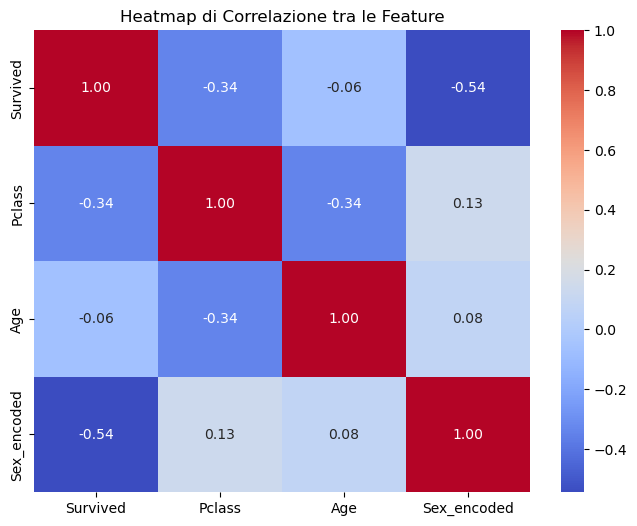

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcolo la matrice di correlazione sulle colonne numeriche più importanti
# 'Sex_encoded': 1 è 'male', 0 è 'female'
# 'Pclass': 1 è la classe più alta, 3 la più bassa
correlation_matrix = df[['Survived', 'Pclass', 'Age', 'Sex_encoded']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix, 
    annot=True,     
    cmap='coolwarm', 
    fmt=".2f"       
)
plt.title('Heatmap di Correlazione tra le Feature')
plt.show()

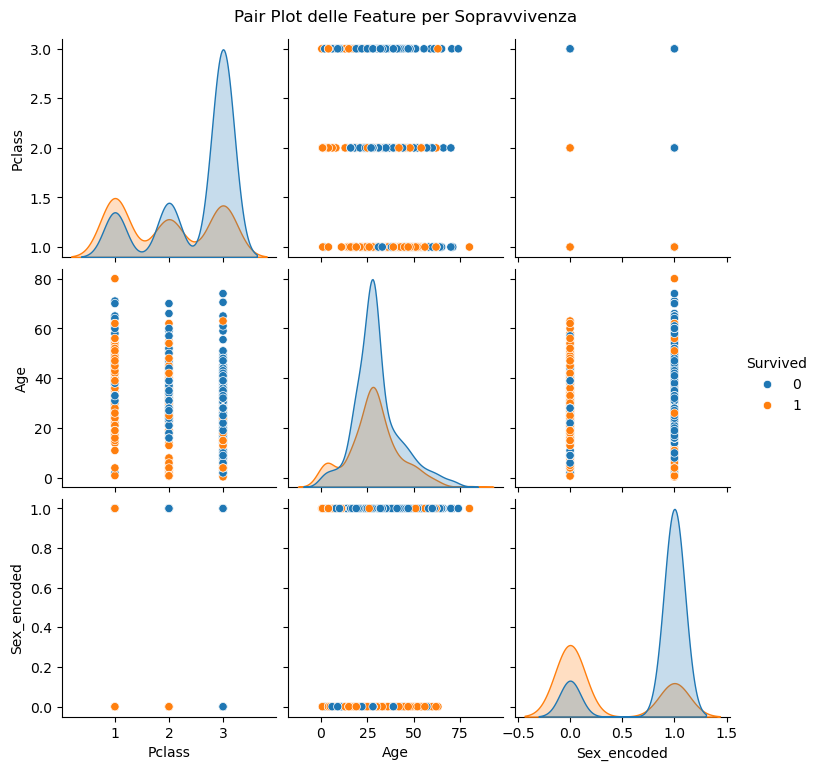

In [24]:
# Creo un pair plot per visualizzare le relazioni tra le feature e le distribuzioni di ognuna di esse.
# hue='Survived' colora i dati in base alla sopravvivenza (0 o 1)
# 'Sex_encoded': 1 è 'male', 0 è 'female'

sns.pairplot(
    df[['Survived', 'Pclass', 'Age', 'Sex_encoded']], 
    hue='Survived', 
)
plt.suptitle('Pair Plot delle Feature per Sopravvivenza', y=1.02) 
plt.show()

## 3. Suddivisione Dataframe

In [12]:
# Stabilisco features e target
X = df[['Sex_encoded', 'Age', 'Pclass', 'Embarked_C','Embarked_Q','Embarked_S']]
y = df['Survived']

In [17]:
# Divisione in training e in test set
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [18]:
# Seconda divisione del trainig set, suddiviso in train e validation
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=0)

print('Full train:', X_train_full.shape)
print('Train:', X_train.shape)
print('Validation:', X_val.shape)
print('Test:', X_test.shape)

Full train: (668, 6)
Train: (501, 6)
Validation: (167, 6)
Test: (223, 6)


## 4. Addestramento e Tuning del Modello

In [22]:
# Determino i valori per lka profondità del decision tree 
depth_values = [2, 5, 10, 25, None] # imposto none per profondità massima
results= {}

for depth in depth_values:
    model = DecisionTreeClassifier(max_depth=depth, random_state=0)
    model.fit(X_train, y_train)

    val_preds = model.predict(X_val)
    val_acc = accuracy_score(y_val, val_preds)

    results[depth] = val_acc
    print(f'max depth: {depth}, Validation_accuracy: {val_acc:.4f}')

# Identifico la profondità con la migliore accuracy
best_depth = max(results, key=results.get)
print(f'\nBest max_depth based on validation accuracy: {best_depth}')

max depth: 2, Validation_accuracy: 0.7904
max depth: 5, Validation_accuracy: 0.8024
max depth: 10, Validation_accuracy: 0.8084
max depth: 25, Validation_accuracy: 0.7904
max depth: None, Validation_accuracy: 0.7904

Best max_depth based on validation accuracy: 10


## 5. Valutazione del Modello

In [25]:
# Addestro il modello sulla profondità migliore e la prima ripartizione del dataset
final_model = DecisionTreeClassifier(max_depth=best_depth, random_state=0)
final_model.fit(X_train_full, y_train_full)

# Valuto il modello finale su test
test_preds = final_model.predict(X_test)
test_acc = accuracy_score(y_test, test_preds)
print(f'Test accuracy with best depth = {best_depth}: {test_acc:.4f}')

Test accuracy with best depth = 10: 0.7892
